# **Support Vector Machine**

## **Titanic** : classification

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.drop(['class',"embarked",'alive'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


In [ ]:
df.drop("deck",axis=1,inplace=True)

In [ ]:
df.dropna(subset=["embark_town"],inplace=True)

<Axes: >

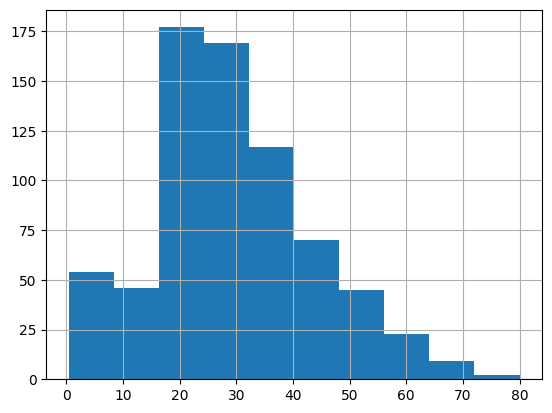

In [ ]:
df["age"].hist()

In [ ]:
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-2039613669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


In [ ]:
df.shape

(889, 11)

In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(773, 11)

In [ ]:
print(df["who"].unique())

['man' 'woman' 'child']


In [ ]:
print(df["adult_male"].unique())

[ True False]


In [ ]:
print(df["alone"].unique())

[False  True]


In [ ]:
print(df["embark_town"].unique())

['Southampton' 'Cherbourg' 'Queenstown']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['who'] = le.fit_transform(df['who'])
df['adult_male'] = le.fit_transform(df['adult_male'])
df['alone'] = le.fit_transform(df['alone'])
df['embark_town'] = le.fit_transform(df['embark_town'])

In [ ]:
df["sex"].isnull().sum()

np.int64(0)

In [ ]:
dummies = pd.get_dummies(df["sex"]).astype(int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
887,1,0
888,1,0
889,0,1


In [ ]:
df = pd.concat([df,dummies],axis="columns")
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,male,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,female,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,male,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,female,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,male,26.0,0,0,30.0000,1,1,0,1,0,1


In [ ]:
df.drop(["sex"],axis="columns",inplace=True)
df

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,26.0,0,0,30.0000,1,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
x = df[['pclass', 'fare', 'embark_town',"pclass","who","adult_male","alone"]]
y = df['survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.79


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = SVC(kernel='poly',degree=8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.56


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = SVC(kernel='rbf')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.61


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.50


## **Diamonds**:Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/diamonds(EDA).csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [ ]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df.duplicated().sum()

np.int64(126)

In [ ]:
df.shape

(50000, 10)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49874, 10)

In [ ]:
df["clarity"].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[1,2,3,4,5,6,7,8],inplace=True)

/tmp/ipython-input-3591332369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["clarity"].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[1,2,3,4,5,6,7,8],inplace=True)
/tmp/ipython-input-3591332369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["clarity"].replace(['I

In [ ]:
df["color"].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'],[1,2,3,4,5,6,7],inplace=True)

/tmp/ipython-input-316582390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["color"].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'],[1,2,3,4,5,6,7],inplace=True)
/tmp/ipython-input-316582390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["color"].replace(['J', 'I', 'H', 'G', 'F', 'E', '

In [ ]:
df["cut"].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[1,2,3,4,5],inplace=True)

/tmp/ipython-input-3693530975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cut"].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[1,2,3,4,5],inplace=True)
/tmp/ipython-input-3693530975.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cut"].replace(['Fair', 'Good', 'Very G

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df1=df.head(1000)

In [ ]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
999,0.70,2,6,4,58.7,63.0,2912,5.69,5.73,3.35
1000,0.73,2,6,4,63.2,56.0,2912,5.75,5.76,3.64
1001,0.80,4,6,3,61.2,60.0,2912,5.97,5.95,3.65
1002,1.00,1,3,2,65.2,54.0,2912,6.30,6.22,4.08


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
x = df1[['carat','color','clarity','table','cut','depth','x','y','z']]
y = df1['price']

x_train , x_test , y_train ,y_test = train_test_split(x ,y ,test_size=0.25 , random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.9675458117894765

In [ ]:
from sklearn.svm import SVR

In [ ]:
x = df1[['carat','color','clarity','table','cut','depth','x','y','z']]
y = df1['price']

x_train , x_test , y_train ,y_test = train_test_split(x ,y ,test_size=0.25 , random_state=42)

In [ ]:
model = SVR(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.3351368932051517

In [ ]:
model = SVR(kernel='poly',degree=8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test,y_test)

-0.19304597071695295

In [ ]:
model = SVR(kernel='rbf')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test,y_test)

-0.21602221847916114

In [ ]:
model = SVR(kernel='sigmoid')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test,y_test)

-0.21641387277782553